<a href="https://colab.research.google.com/github/itsGab/projeto-bootcamp-modulo-2-data-science/blob/main/nb-de-limpeza/limpandando_populacao_estimada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limpeza dos dados de estimativa de populacao!

In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date


In [251]:
# populacao estimada
url_pop = 'https://github.com/itsGab/projeto-bootcamp-modulo-2-data-science/raw/main/dados-brutos/populacao%20estimada%20por%20uf%20segundo%20ano%20de%201992%20a%202019.csv'

p_estimada = pd.read_csv(
    url_pop,
    sep=';',
    encoding='latin-1',
    engine='python',
    skiprows=3,
    skipfooter=11,
    decimal=',',
    thousands='.'
)


In [ ]:
# tratando o dataframe
p_estimada = p_estimada.drop('Total', axis=1)
p_estimada['Ano'] = p_estimada['Ano'].map({ano: date(ano,1,1) for ano in p_estimada['Ano']})

# usando melt
p_derretida = p_estimada.melt(id_vars='Ano')
p_derretida.columns = ['ano', 'uf', 'populacao']


Dentro do dataframe ainda a espaco para melhora, adicionando a regiao de cada uf!


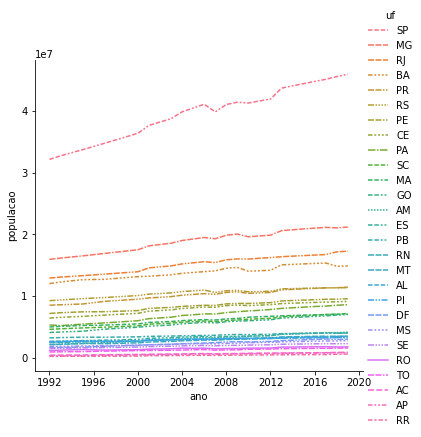

In [269]:
# ordenando os uf baseados no valor de 2019
ordem_pop = p_derretida.query('ano == datetime.date(2019, 1, 1)').sort_values('populacao', ascending=False).uf.to_list()

# plotando para ver se nao existe nada de estranho
sns.relplot(data=p_derretida, y='populacao', x='ano', hue='uf', kind='line', hue_order=ordem_pop, style='uf')

In [270]:
# gerando o csv dos df tratados
p_derretida.to_csv('populacao_derretida.csv')
p_estimada.to_csv('populacao_estimada.csv')
